Training Data Pre-processing

In [0]:
pip install openpyxl

Python interpreter will be restarted.
Collecting openpyxl
 Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
Collecting et-xmlfile
 Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Installing collected packages: et-xmlfile, openpyxl
Successfully installed et-xmlfile-1.1.0 openpyxl-3.0.10
Python interpreter will be restarted.

In [0]:
pip install pickle-mixin

Python interpreter will be restarted.
Collecting pickle-mixin
 Downloading pickle-mixin-1.0.2.tar.gz (5.1 kB)
Building wheels for collected packages: pickle-mixin
 Building wheel for pickle-mixin (setup.py): started
 Building wheel for pickle-mixin (setup.py): finished with status 'done'
 Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5998 sha256=a2d715a2dc10ebb6e992bdd6e0a5f696203e7630960fd28300e785cdd0104987
 Stored in directory: /root/.cache/pip/wheels/2a/a4/6c/83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin
Installing collected packages: pickle-mixin
Successfully installed pickle-mixin-1.0.2
Python interpreter will be restarted.

In [0]:
pip install textblob

Python interpreter will be restarted.
Collecting textblob
 Downloading textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Requirement already satisfied: nltk>=3.1 in /databricks/python3/lib/python3.8/site-packages (from textblob) (3.6.1)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk>=3.1->textblob) (1.0.1)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk>=3.1->textblob) (7.1.2)
Requirement already satisfied: regex in /databricks/python3/lib/python3.8/site-packages (from nltk>=3.1->textblob) (2021.4.4)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk>=3.1->textblob) (4.59.0)
Installing collected packages: textblob
Successfully installed textblob-0.17.1
Python interpreter will be restarted.

In [0]:
import matplotlib.pyplot as plt

import os
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import string
import pandas as pd
import numpy as np
import re
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!

In [0]:
os.chdir("/dbfs/FileStore/shared_uploads/xiaomeng.fan@aia.com/")

In [0]:
file_path = "/dbfs/FileStore/shared_uploads/xiaomeng.fan@aia.com/"
df_raw = pd.read_excel(file_path+"Copy_of_Jun_2022_Training_Data___ML.xlsx")
df_pos_term = pd.read_excel(file_path+"pos_terms.xlsx")

pos_terms = [i.lower() for i in df_pos_term['pos_terms']]
pos_terms_list = '|'.join(pos_terms)

In [0]:
df_stg1 = df_raw[['question','POS / Non-POS']].rename(columns={'question':'qns','POS / Non-POS':'tag'}).dropna()
display(df_stg1)

qns,tag
H223497209 giro,CNC
Thanks thats all,Small Talk
Q514050177,Small Talk
Q514050177 dividend,POS
Q514050177 dividend payment,POS
L533278532 coupon,POS
Q514050177 dividend withdrawal,POS
premium holiday,POS
replacement,Small Talk
yes,Small Talk


In [0]:
##List of stopword from db table
stopwords_query_result = spark.sql("""
select * from ops_pos_wrk.aosda_maia_stopwords
""")

df_stopwords = stopwords_query_result.toPandas()

In [0]:
sw_terms = [i.lower() for i in df_stopwords['stopword']]
            
print(sw_terms)

['afternoon', 'singapore', 'alexander', 'jennifers', 'thankyou', 'livechat', 'question', 'evening', 'apology', 'claudia', 'already', 'alright', 'morning', 'syakir', 'please', 'thanks', 'jessie', 'client', 'would', 'thank', 'hello', 'nisha', 'check', 'noted', 'month', 'great', 'still', 'live', 'good', 'dont', 'alex', 'yeah', 'thks', 'like', 'haha', 'cant', 'yoke', 'lynn', 'week', 'wait', 'help', 'chat', 'much', 'okay', 'dear', 'czen', 'june', 'sim', 'aug', 'apr', 'dec', 'yin', 'feb', 'aik', 'pls', 'mar', 'jun', 'jan', 'han', 'aia', 'see', 'jul', 'oct', 'wah', 'may', 'yes', 'yet', 'lah', 'hui', 'com', 'bye', 'nov', 'leh', 'sep', 'hao', 'lor', 'hi', 'go', 'ya', 'um', 'no', 'ji', 'ah', 'ok', 'ru', 'ty', 'la', 'sg', 'im', 'u']

In [0]:
stopword_nltk = nltk.corpus.stopwords.words('english')
stopword_full = stopword_nltk+sw_terms

In [0]:
question_clean = []
for chat in df_stg1['qns']:
  chat_orig = chat.lower()
  chat_pol_clean = re.sub(r'\w{1}\d{9}','AIAPolNum',chat_orig)
  chat_pol_nric_clean = re.sub(r'[sfgtm]\d{7}[a-z]','CustNRIC',chat_pol_clean)
  chat_pol_nric_posterm_clean = re.sub(pos_terms_list,'AIAPOSTerm',chat_pol_nric_clean)
  chat_pol_nric_posterm_dpmt_clean = re.sub(r'u&i|cnc|clm|pos','OpsDpmt',chat_pol_nric_posterm_clean)
  
  chat_clean_token = " ".join([word for word in nltk.word_tokenize(chat_pol_nric_posterm_dpmt_clean) if word not in stopword_full])
  chat_clean_token_punc =  " ".join(word.strip(string.punctuation) for word in chat_clean_token.split())
  
  emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
  chat_clean_token_punc_emo = emoji_pattern.sub(r'', chat_clean_token_punc) # Remove Emoji
  
  lemmatizer = WordNetLemmatizer()
  chat_clean_final = ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(chat_clean_token_punc_emo)]) ## Lemmatization replaced Stemming 
    
  question_clean.append(chat_clean_final) 

In [0]:
for i in range(20):
  print(df_stg1['qns'][i] + " ->" + question_clean[i])

H223497209 giro ->AIAPolNum giro
Thanks thats all ->thats
Q514050177 ->AIAPolNum
Q514050177 dividend ->AIAPolNum dividend
Q514050177 dividend payment ->AIAPolNum dividend payment
L533278532 coupon ->AIAPolNum coupon
Q514050177 dividend withdrawal ->AIAPolNum dividend withdrawal
premium holiday ->premium holiday
replacement ->replacement
yes ->
P564500596 ->AIAPolNum
A510008660 - client feedback not yet got her monthly payout, please check ->AIAPolNum feedback got monthly payout
H235938743 reinstatement ->AIAPolNum reinstatement
Stay safe and bye ->stay safe
H224151117 - client signed and sent in a counteroffer, why counter offer closed? ->AIAPolNum signed sent counteroffer counter offer closed
S0287149A ->CustNRIC
servicing ->servicing
H241916306 - client signed and submitted required documents, please check U&I receive? ->AIAPolNum signed submitted required document OpsDpmt receive
Q512134642 - Power of Attorney (LPA) form 1 done, can the donee can sign on all policy changes from now on? ->AIAPolNum power attorney lpa form 1 done donee sign policy change
good afternoon, may i check if i can add in rider for an older term "AIA Secure Term", lets say Critical Illness rider ->add rider older term secure term let say critical illness rider

In [0]:
df_stg1['qns_clean'] = question_clean

In [0]:
display(df_stg1)

qns,tag,qns_clean
H223497209 giro,CNC,AIAPolNum giro
Thanks thats all,Small Talk,thats
Q514050177,Small Talk,AIAPolNum
Q514050177 dividend,POS,AIAPolNum dividend
Q514050177 dividend payment,POS,AIAPolNum dividend payment
L533278532 coupon,POS,AIAPolNum coupon
Q514050177 dividend withdrawal,POS,AIAPolNum dividend withdrawal
premium holiday,POS,premium holiday
replacement,Small Talk,replacement
yes,Small Talk,


In [0]:
df_stg1.to_pickle(file_path+"stg1_clean.pkl")

Binary Classification

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics ## what is the difference from these 2

from pandas.core.common import SettingWithCopyWarning
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning ## Difference?

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)## What is the purpose of these warning changes 

import pickle


In [0]:
df_training  = df_stg1.copy() ### why copy instead of direct assignment
df_training['tag'] = np.where(df_training['tag'] != 'POS', 'Non POS', 'POS')

In [0]:
seed_num = 123

tfidf = TfidfVectorizer(min_df = 0.002, ngram_range=(1,2), use_idf = True,sublinear_tf = True
                       ,max_df = 0.9)
# Q: How to choose sublinear_tf is ture or false
# Ref: If you want to reduce the bias generated by length then using sublinear_tf = True will be a way to solve it

features = tfidf.fit_transform(df_stg1.qns_clean).toarray() ## why have to be array
# Q: when to use fit_transform/transform/fit
labels = df_stg1.tag

In [0]:
models = [
  RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = seed_num),
  LinearSVC(),
  LogisticRegression(random_state = seed_num),
  XGBClassifier(),
  SVC(),
  MultinomialNB()
]

In [0]:
# k - fold Cross-Validation
cv = 5
cv_df = pd.DataFrame(index=range(cv * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__##What is this format? 
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=cv)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])

[03:00:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:00:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:00:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:01:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:01:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

In [0]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
max_accuracy = cv_df.groupby('model_name').accuracy.max()
min_accuracy = cv_df.groupby('model_name').accuracy.min()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

result_accuracy_matrix = pd.concat([min_accuracy, mean_accuracy, max_accuracy, std_accuracy], axis=1, ignore_index = True)
result_accuracy_matrix.columns = ['Min Accuracy', 'Mean Accuracy', 'Max Accuracy', 'Standard deviation']
result_accuracy_matrix.sort_values(by = 'Mean Accuracy', ascending = False)

Out[16]:

,Min Accuracy,Mean Accuracy,Max Accuracy,Standard deviation
model_name,,,,
SVC,0.884202,0.890065,0.896516,0.004604
XGBClassifier,0.875033,0.884196,0.894682,0.007341
LinearSVC,0.879748,0.882205,0.887579,0.003295
LogisticRegression,0.878701,0.881052,0.882368,0.001385
MultinomialNB,0.851153,0.857681,0.863505,0.004568
RandomForestClassifier,0.681080,0.686701,0.693739,0.006026


Check Model with Highest Accuracy

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=seed_num, stratify=labels)

In [0]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [0]:
print("\t\tConfusion Matrix\n"+metrics.classification_report(y_test, y_pred))


Confusion Matrix
 precision recall f1-score support

 Non POS 0.91 0.93 0.92 2998
 POS 0.88 0.84 0.86 1773

 accuracy 0.90 4771
 macro avg 0.89 0.89 0.89 4771
weighted avg 0.90 0.90 0.90 4771

Out[20]:

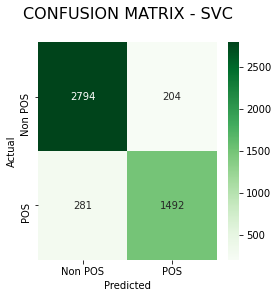

Text(0.5, 1.0, 'CONFUSION MATRIX - SVC\n')

In [0]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot = True, cmap = "Greens", fmt='d',
           xticklabels = model.classes_,
           yticklabels = model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - SVC\n", size = 16)

In [0]:
Save_Model_Name = '/dbfs/FileStore/shared_uploads/xiaomeng.fan@aia.com/POS_MAIA_Questions_Classification_Model.sav'
pickle.dump(model, open(Save_Model_Name, 'wb')) ## where can find the sav saved in databricks?

Some Un-used Content ## What are these data prepared for?

In [0]:
df_select_raw  = df_stg1.copy()

In [0]:
df_select_raw['tag_id'] = df_select_raw['tag'].factorize()[0]
## Note the Department Numeric Code
tag_id_df = df_select_raw[['tag','tag_id']].drop_duplicates()
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id','tag']].values)

In [0]:
# Note: unigram is 1-word sentence; Bigram is 2-word sentence

tag_group = df_select_raw['tag'].drop_duplicates()

N= 10
for tag, tag_id in sorted(tag_to_id.items()):
  features_chi2 = chi2(features, labels == tag)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("==>" + tag)
  print(" * Most Correlated Unigrams are: %s" %(','.join(unigrams[-N:])))
  print(" * Most Correlated Bigrams are: %s" %(','.join(bigrams[-N:])))

==>CNC
 * Most Correlated Unigrams are: downgrade,done,document,doctor,dividend,discount,detail,deopsdpmtit,deduction,yesterday
 * Most Correlated Bigrams are: aiapolnum know,counter offer,hard copy,grace period,gold max,giro deduction,healthshield gold,critical illness,credit card,deduction date
==>Non POS
 * Most Correlated Unigrams are: nomination,value,aiapolnum,coupon,refund,surrender,reinstatement,change,premium,claim
 * Most Correlated Bigrams are: add rider,aiapolnum coupon,aiapolnum premium,pending requirement,counter offer,premium paid,aiapolnum reinstatement,value aiapolnum,aiapolnum claim,surrender value
==>POS
 * Most Correlated Unigrams are: nomination,value,aiapolnum,coupon,refund,surrender,reinstatement,change,premium,claim
 * Most Correlated Bigrams are: add rider,aiapolnum coupon,aiapolnum premium,pending requirement,counter offer,premium paid,aiapolnum reinstatement,value aiapolnum,aiapolnum claim,surrender value
==>Small Talk
 * Most Correlated Unigrams are: downgrade,done,document,doctor,dividend,discount,detail,deopsdpmtit,deduction,yesterday
 * Most Correlated Bigrams are: aiapolnum know,counter offer,hard copy,grace period,gold max,giro deduction,healthshield gold,critical illness,credit card,deduction date